# Data Augmentation
___
by Oliver Thomaschewski (Matrikelnummer) and Lisa-Marlen Wiegandt (572770)

## Link zur Präsentation

https://docs.google.com/presentation/d/1ynsTBfkaSOx5H7MoUForDk7t-b1NwtIKjco2gjHw7Zg/edit?usp=sharing

## Table of content
___
1. [What is data augmentation](#What-is-data-augmentation)
1. [Why use data augmentation](#why-use-data-augmentation)
    2. Challenges
    2. Use Cases
1. [Example: Image augmentation](#Image-augmentation)
    2. Simple transformations
    2. Advanced techniques
1. [Sources](#Sources)

## What is data augmentation
___
* artificially increase of data set
* synthesizing new data from given data
    * amount of data increased
    * diversity of data increased


## Why use data augmentation
___
* prediction accuracy based on amount and diversity of training data
* therefore imporving prediction (best case)
* reducing cost of collecting and labeling data
* preventing data privacy problems
    
#### Challenges
* useful augmentation
* needs to analyze output quality of augmentation
* reproducing biases from original dataset  

#### Use Cases

* Small dataset for medical images, especially for rare diseases
* due to data privacy regulations data is not given

## Image augmentation
___
* simple alteration popular 
* or generation of new synthetic data with more advanced techniques

Some examples of data augmentation with torchvision.transforms

we start with one picture ##maybe htw picture ??????

In [ ]:
from PIL import Image
import PIL
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch
import numpy as np
import torchvision.transforms as T


## Transformation Examples

In [ ]:
# Load Image

orig_img = Image.open(Path("images/flower.png"))
img_width, img_height = orig_img.size


### Grayscale

In [ ]:

gray_img = T.Grayscale()(orig_img)
gray_img

### Flip

In [ ]:
hflip_img = T.functional.hflip(orig_img)
vflip_img = T.functional.vflip(orig_img)

display(hflip_img, vflip_img)

### Translate


In [ ]:
translate_img = T.functional.affine(orig_img, angle = 0, translate=[100 ,40], scale=1, shear=0)
translate_img

### Rotate

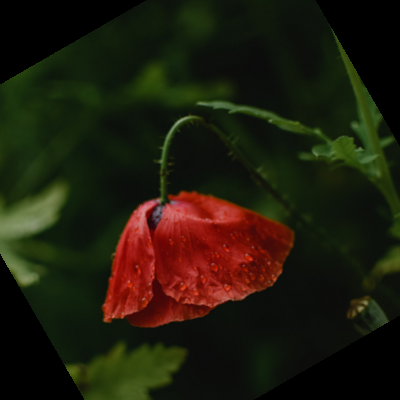

In [403]:
rotate_img = T.functional.rotate(orig_img, angle = 30.0, interpolation= T.InterpolationMode.BICUBIC)
rotate_img

### Random affine
    

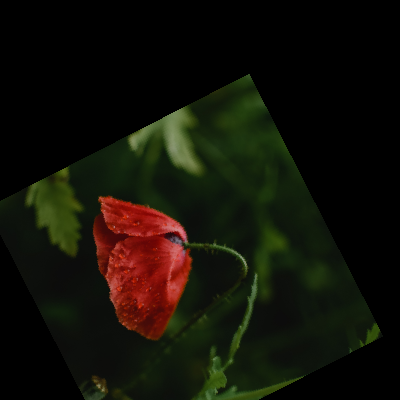

In [425]:
affine_img = T.RandomAffine(degrees=(30,70), translate=(0.1, 0.3), scale=(0.5, 0.75))(orig_img)
affine_img



### Center cropping

In [ ]:
crop_size = 200

crop_img = T.CenterCrop(crop_size)(orig_img)
crop_img = T.Resize(img_height)(crop_img)
crop_img

### Random Cropping

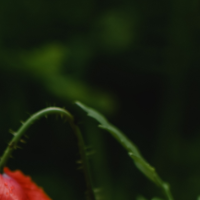

In [415]:
rand_crop_img = T.RandomCrop(200)(orig_img)

rand_crop_img

Add Gaussian Blur

In [ ]:
blurred_img = T.GaussianBlur(kernel_size=(33,33), sigma=(2, 2))(orig_img) 
blurred_img

ColorJitter 

In [ ]:
jitter_img = T.ColorJitter(brightness = 0.5, contrast=0.5, saturation=0.5, hue=0.5)(orig_img)
# HUE Sinnvoll?
jitter_img

Random Augment  

In [ ]:
rand_img = T.RandAugment(num_ops=5)(orig_img)
rand_img

## Elastic Transformation

In [ ]:
elastic_img = T.ElasticTransform(alpha= 100.0)(orig_img)
elastic_img

## Baseline Model

To get a referenc eon the training data and from there on, tweak the used algorithm and training data to try to achieve better results than the baseline model

1. Use Baseline model with exisiting Data Set
2. Get Benchmark values
3. Add one kind of data Augmentation ( flipping, blurr, greyscale)
4. Decide / Try if Data Augmentation gives better results than baseline model.
5. Repeat 3 & 4

### Questions
Should we show a training with and without augmentation or can we use an existing model we find online?
Testing Data with Baseline model?
When we use a baseline model, do we use the augmented data there or on our own model?

## Sources

first 
https://www.mygreatlearning.com/blog/understanding-data-augmentation/
https://research.aimultiple.com/data-augmentation/

second
https://snapstack.cz/data-augmentation-advantages-challenges-and-instances/
https://research.aimultiple.com/data-augmentation/

third
https://towardsdatascience.com/a-comprehensive-guide-to-image-augmentation-using-pytorch-fb162f2444be

Baseline Models:<br>
https://towardsdatascience.com/baseline-models-your-guide-for-model-building-1ec3aa244b8d <br>
https://towardsai.net/p/l/what-are-baseline-models-and-benchmarking-for-machine-learning-why-we-need-them

get_transforms in fastai

https://towardsdatascience.com/image-classification-baseline-model-for-2020-1d33f0986fc0

pytorch transformations:

https://pytorch.org/vision/stable/transforms.html

Always start stupid:

https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa